# GDAL - Parte II

In [1]:
# importar biblioteca
from osgeo import gdal

# importar constantes
from gdalconst import *

# para visualizar as imagens, vamos utilizar a matplotlib
import matplotlib.pyplot as plt

# informar o uso de exceções
gdal.UseExceptions()

# biblioteca de funções relacionadas ao sistema
# sys: System-specific parameters and functions
import sys

try:
    # criar o dataset (filename) abrindo o arquivo para leitura (GA_ReadOnly)
    filename = "./raster/crop-1-band-5.tif"
    dataset = gdal.Open(filename, GA_ReadOnly) 
except:
    print("Erro na abertura do arquivo!")

# operações no raster
# ...

# fechar o dataset e liberar memória
dataset = None 

## Operações básicas com diversas imagens

Ao trabalhar com mais de uma imagem (mais de um arquivo), é importante garantir que as informações de todas as imagens estejam compatíveis.

In [2]:
# vamos abrir 4 imagens para realizar os testes
filename_crop_1_band_5 = "./raster/crop-1-band-5.tif"
filename_crop_1_band_7 = "./raster/crop-1-band-7.tif"
filename_crop_2_band_5 = "./raster/crop-2-band-5.tif"
filename_crop_2_band_7 = "./raster/crop-2-band-7.tif"

try:
    dataset_crop_1_band_5 = gdal.Open(filename_crop_1_band_5, GA_ReadOnly) 
    print (dataset_crop_1_band_5.GetGeoTransform())

    dataset_crop_1_band_7 = gdal.Open(filename_crop_1_band_7, GA_ReadOnly) 
    print (dataset_crop_1_band_7.GetGeoTransform())

    dataset_crop_2_band_5 = gdal.Open(filename_crop_2_band_5, GA_ReadOnly) 
    print (dataset_crop_2_band_5.GetGeoTransform())

    dataset_crop_2_band_7 = gdal.Open(filename_crop_2_band_7, GA_ReadOnly) 
    print (dataset_crop_2_band_7.GetGeoTransform())
except:
    print ("Erro na abertura de algum arquivo!")

(583540.0, 2.0, 0.0, 7507374.0, 0.0, -2.0)
(583540.0, 2.0, 0.0, 7507374.0, 0.0, -2.0)
(584378.0, 2.0, 0.0, 7508152.0, 0.0, -2.0)
(584378.0, 2.0, 0.0, 7508152.0, 0.0, -2.0)


Duas imagens podem ter o mesmo número de linhas e colunas, e isso vai refletir em matrizes de pixels de mesma dimensão. Porém, se não tiverem os mesmos parâmetros geográficos, não faz sentido integrar essas informações.

In [3]:
# verificar se os crops são da mesma região, ou não
print (dataset_crop_1_band_5.GetGeoTransform() == dataset_crop_1_band_7.GetGeoTransform())
print (dataset_crop_2_band_5.GetGeoTransform() == dataset_crop_2_band_7.GetGeoTransform())
print (dataset_crop_1_band_5.GetGeoTransform() == dataset_crop_2_band_7.GetGeoTransform())

# verificar se os sistemas de coordenadas são iguais
print (dataset_crop_1_band_5.GetProjectionRef() == dataset_crop_2_band_5.GetProjectionRef())

True
True
False
True


In [4]:
# mostrar a quantidade de bandas de cada imagem
print (dataset_crop_1_band_5.RasterCount)
print (dataset_crop_1_band_7.RasterCount)
print (dataset_crop_2_band_5.RasterCount)
print (dataset_crop_2_band_7.RasterCount)

1
1
1
1


O Histograma de uma banda é uma representação visual da quantidade de pixels de cada nível de cinza, encontrados na imagem.

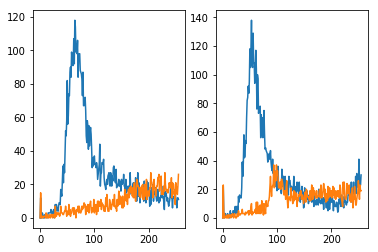

In [17]:
# neste caso todas as imagens possuem uma banda cada
crop_1_band_5 = dataset_crop_1_band_5.GetRasterBand(1)
crop_1_band_7 = dataset_crop_1_band_7.GetRasterBand(1)
crop_2_band_5 = dataset_crop_2_band_5.GetRasterBand(1)
crop_2_band_7 = dataset_crop_2_band_7.GetRasterBand(1)

# é possível visualizar algumas propriedades das bandas, como o histograma
plt.subplot(121)
plt.plot(crop_1_band_5.GetHistogram())
plt.plot(crop_1_band_7.GetHistogram())

plt.subplot(122)
plt.plot(crop_2_band_5.GetHistogram())
plt.plot(crop_2_band_7.GetHistogram())

In [6]:
# para se realizar cálculos com as bandas, usamos a conversão para matriz numpy
numpy_crop_1_band_5 = crop_1_band_5.ReadAsArray()
numpy_crop_1_band_7 = crop_1_band_7.ReadAsArray()
numpy_crop_2_band_5 = crop_2_band_5.ReadAsArray()
numpy_crop_2_band_7 = crop_2_band_7.ReadAsArray()

print (numpy_crop_1_band_5.shape)
print (numpy_crop_1_band_7.shape)
print (numpy_crop_2_band_5.shape)
print (numpy_crop_2_band_7.shape)

(400, 400)
(400, 400)
(400, 400)
(400, 400)


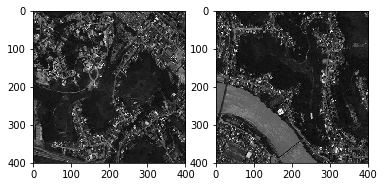

In [22]:
# para visualizar as bandas como imagens
plt.subplot(121)
plt.imshow(numpy_crop_1_band_5 * 100, cmap='gray')

plt.subplot(122)
plt.imshow(numpy_crop_2_band_5 * 100, cmap='gray')

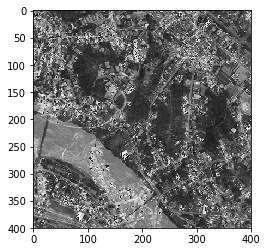

In [20]:
# as bandas representadas por matrizes numpy não possuem informações geográficas
plt.imshow(100 * (numpy_crop_1_band_5 + numpy_crop_2_band_5), cmap='gray')

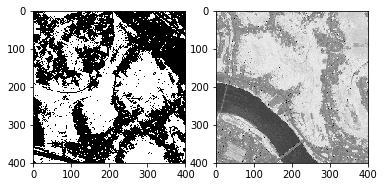

In [30]:
# criar bandas de índices de vegetação (band_5 -> red, band_7 -> ired)
plt.subplot(121)
crop_1_ndvi = (numpy_crop_1_band_7.astype(float) - numpy_crop_1_band_5.astype(float)) / \
              (numpy_crop_1_band_7.astype(float) + numpy_crop_1_band_5.astype(float))
plt.imshow(crop_1_ndvi > 0.5, cmap='gray')


plt.subplot(122)
crop_2_ndvi = (numpy_crop_2_band_7.astype(float) - numpy_crop_2_band_5.astype(float)) / \
              (numpy_crop_2_band_7.astype(float) + numpy_crop_2_band_5.astype(float))
plt.imshow(crop_2_ndvi, cmap='gray')